In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from random import randrange
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

Using TensorFlow backend.


# Data Preprocessing

In [2]:
data = []
paths = []
ans = []
for r, d, f in os.walk(r"C:\Users\Vee\Desktop\python\CNNs\trash\r"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((256,256))
    data.append(np.array(x))
    ans.append([1])

In [3]:
paths = []
for r, d, f in os.walk(r"C:\Users\Vee\Desktop\python\CNNs\trash\t"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((256,256))
    data.append(np.array(x))
    ans.append([-1])

In [4]:
data = np.array(data)/255

In [5]:
data = data.reshape(len(data), 196608)

In [6]:
ans = np.array(ans)
ans = ans.reshape(len(ans),1)

In [7]:
kf = KFold(n_splits=5,shuffle=True, random_state=69)
models = []

In [8]:
tree_1 = DecisionTreeClassifier(max_depth=3)

In [9]:
accuracy = []
#K-Fold Cross Validation
for train_index, test_index in kf.split(data):
    x_train, x_test = data[train_index], data[test_index]
    y_train, y_test = ans[train_index], ans[test_index]
    #Fit model on each fold
    tree_1.fit(x_train, y_train)
    #Predict on testing fold
    predict = tree_1.predict(x_test)
    predict = predict.reshape(len(predict),1)
    #Accuracy between prediction and true value for each K-Fold Validation
    accuracy.append(accuracy_score(y_test, predict))

In [10]:
mean = np.average(accuracy)
models.append(mean)
print(mean)

0.9606153846153846


In [11]:
tree_2 = DecisionTreeClassifier(max_depth=6)

In [12]:
accuracy = []
#K-Fold Cross Validation
for train_index, test_index in kf.split(data):
    x_train, x_test = data[train_index], data[test_index]
    y_train, y_test = ans[train_index], ans[test_index]
    #Fit model on each fold
    tree_2.fit(x_train, y_train)
    #Predict on testing fold
    predict = tree_2.predict(x_test)
    predict = predict.reshape(len(predict),1)
    #Accuracy between prediction and true value for each K-Fold Validation
    accuracy.append(accuracy_score(y_test, predict))

In [13]:
mean = np.average(accuracy)
models.append(mean)
print(mean)

0.9683076923076923


In [14]:
tree_3 = DecisionTreeClassifier(max_depth=9)

In [15]:
accuracy = []
#K-Fold Cross Validation
for train_index, test_index in kf.split(data):
    x_train, x_test = data[train_index], data[test_index]
    y_train, y_test = ans[train_index], ans[test_index]
    #Fit model on each fold
    tree_3.fit(x_train, y_train)
    #Predict on testing fold
    predict = tree_3.predict(x_test)
    predict = predict.reshape(len(predict),1)
    #Accuracy between prediction and true value for each K-Fold Validation
    accuracy.append(accuracy_score(y_test, predict))

In [16]:
mean = np.average(accuracy)
models.append(mean)
print(mean)

0.9763076923076923


In [17]:
tree_4 = DecisionTreeClassifier(max_depth=12)

In [18]:
accuracy = []
#K-Fold Cross Validation
for train_index, test_index in kf.split(data):
    x_train, x_test = data[train_index], data[test_index]
    y_train, y_test = ans[train_index], ans[test_index]
    #Fit model on each fold
    tree_4.fit(x_train, y_train)
    #Predict on testing fold
    predict = tree_4.predict(x_test)
    predict = predict.reshape(len(predict),1)
    #Accuracy between prediction and true value for each K-Fold Validation
    accuracy.append(accuracy_score(y_test, predict))

In [19]:
mean = np.average(accuracy)
models.append(mean)
print(mean)

0.9606153846153846


In [20]:
tree_5 = DecisionTreeClassifier(max_depth=14)

In [21]:
accuracy = []
#K-Fold Cross Validation
for train_index, test_index in kf.split(data):
    x_train, x_test = data[train_index], data[test_index]
    y_train, y_test = ans[train_index], ans[test_index]
    #Fit model on each fold
    tree_5.fit(x_train, y_train)
    #Predict on testing fold
    predict = tree_5.predict(x_test)
    predict = predict.reshape(len(predict),1)
    #Accuracy between prediction and true value for each K-Fold Validation
    accuracy.append(accuracy_score(y_test, predict))

In [22]:
mean = np.average(accuracy)
models.append(mean)
print(mean)

0.9603076923076923


Text(0.5, 0, 'Maximum Tree Depth')

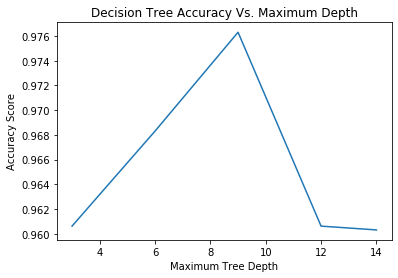

In [23]:
plt.title('Decision Tree Accuracy Vs. Maximum Depth')
plt.plot([3,6,9,12,14],models)
plt.ylabel('Accuracy Score')
plt.xlabel('Maximum Tree Depth')

# Test
The output of the model is positive / negative number based on which class the image belongs to with the magnitude of the number being the confidence of the model

[1]
This item is Recyclable


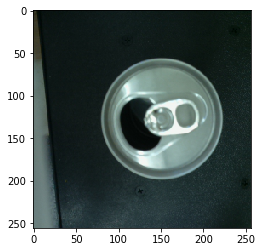

In [24]:
img = Image.open(r'C:\Users\Vee\Desktop\python\CNNs\trash\r\76.jpg')
x = np.array(img)
x = x.reshape(1,256*256*3)
answ = tree_3.predict(x/255)
imshow(img)
print(answ)
if(answ >= 0):
    print("This item is Recyclable")
else:
    print("This item is not Recyclable")

[-1]
This item is not Recyclable


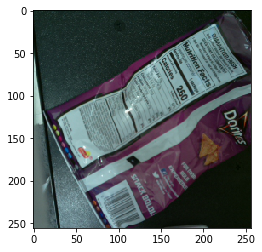

In [25]:
img = Image.open(r'C:\Users\Vee\Desktop\python\CNNs\trash\t\9.jpg')
x = np.array(img)
x = x.reshape(1,256*256*3)
answ = tree_3.predict(x/255)
imshow(img)
print(answ)
if(answ >= 0):
    print("This item is Recyclable")
else:
    print("This item is not Recyclable")